In [1]:
# Step 1: Import necessary packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# Step 3: Define the network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Step 4: Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6868 - loss: 1.1297 - val_accuracy: 0.9057 - val_loss: 0.3396
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9070 - loss: 0.3267 - val_accuracy: 0.9230 - val_loss: 0.2700
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9194 - loss: 0.2807 - val_accuracy: 0.9329 - val_loss: 0.2359
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9318 - loss: 0.2358 - val_accuracy: 0.9399 - val_loss: 0.2121
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9400 - loss: 0.2090 - val_accuracy: 0.9449 - val_loss: 0.1930
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9479 - loss: 0.1859 - val_accuracy: 0.9478 - val_loss: 0.1781
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9503 - loss: 0.1753 - val_accuracy: 0.9533 - val_loss: 0.1605
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9563 - loss: 0.1529 -

In [7]:
# Step 6: Evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

Test accuracy: 95.86%


In [8]:
# Step 7: Plot the training loss and accuracy
plt.figure(figsize=(10, 4))


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

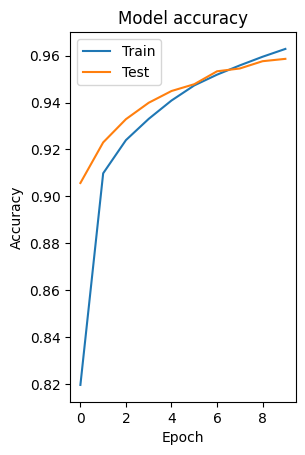

In [9]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

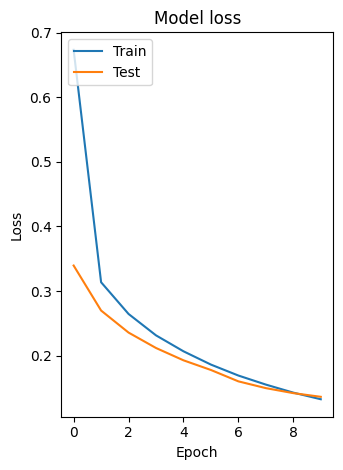

In [12]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()